In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder
df=pd.read_csv('googleplaystore.csv')
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [3]:
df.shape

(10841, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

In [6]:
df1=df.copy()
df1.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [7]:
pd.set_option('display.max_rows',None)
df1['Reviews'].value_counts()

0           596
1           272
2           214
3           175
4           137
5           108
6            97
7            90
8            74
9            65
10           64
12           60
11           52
13           49
17           48
19           41
14           41
16           35
20           35
21           35
15           31
30           30
25           30
24           30
38           29
18           27
22           26
23           25
27           25
28           24
33           24
26           22
41           22
29           20
32           20
31           19
35           18
39           18
37           17
45           17
36           17
54           17
48           17
44           16
40           15
64           15
52           15
53           14
34           14
43           14
78           13
55           13
69           13
67           13
114          13
66           13
88           12
60           12
42           12
57           12
51           12
47           12
80      

In [8]:
df1.Reviews.astype(int)

ValueError: invalid literal for int() with base 10: '3.0M'

In [9]:
df1[df1['Reviews']=='3.0M']

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

In [10]:
df1.iloc[10472]=df1.iloc[10472].shift(1)
df1.iloc[10472]

App                                                   NaN
Category          Life Made WI-Fi Touchscreen Photo Frame
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [11]:
df[df['App'].str.contains('Photo frame')]

App     Category  Rating Reviews Size  Installs  Type Price  \
2818  Photo frame  PHOTOGRAPHY     4.5     859  21M  100,000+  Free     0   

     Content Rating       Genres   Last Updated Current Ver   Android Ver  
2818       Everyone  Photography  July 18, 2018       1.5.1  4.0.3 and up

In [12]:
df1.loc[10472,['App','Category','Genres']]=['Life Made WI-Fi Touchscreen Photo Frame','PHOTOGRAPHY','Photography']

In [13]:
df1.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                      PHOTOGRAPHY
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                        Photography
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [14]:
df1['Reviews']=df1.Reviews.astype(int)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             10841 non-null  object
 1   Category        10841 non-null  object
 2   Rating          9367 non-null   object
 3   Reviews         10841 non-null  int32 
 4   Size            10841 non-null  object
 5   Installs        10841 non-null  object
 6   Type            10840 non-null  object
 7   Price           10841 non-null  object
 8   Content Rating  10841 non-null  object
 9   Genres          10841 non-null  object
 10  Last Updated    10841 non-null  object
 11  Current Ver     10833 non-null  object
 12  Android Ver     10839 non-null  object
dtypes: int32(1), object(12)
memory usage: 1.0+ MB


In [16]:
df[df1.duplicated()]

App             Category  \
229                         Quick PDF Scanner + OCR FREE             BUSINESS   
236                                                  Box             BUSINESS   
239                                   Google My Business             BUSINESS   
256                                  ZOOM Cloud Meetings             BUSINESS   
261                            join.me - Simple Meetings             BUSINESS   
265                                                  Box             BUSINESS   
266                                             Zenefits             BUSINESS   
267                                           Google Ads             BUSINESS   
268                                   Google My Business             BUSINESS   
269                                                Slack             BUSINESS   
270                                   FreshBooks Classic             BUSINESS   
271                                        Insightly CRM             BUSINESS   
272          QuickBooks Accounting: Invoicing & Expenses             BUSINESS   
273                       HipChat - Chat Built for Teams             BUSINESS   
274                             Xero Accounting Software             BUSINESS   
275              MailChimp - Email, Marketing Automation             BUSINESS   
276                 Crew - Free Messaging and Scheduling             BUSINESS   
277                        Asana: organize team projects             BUSINESS   
278                                     Google Analytics             BUSINESS   
279                                      AdWords Express             BUSINESS   
280                          Accounting App - Zoho Books             BUSINESS   
281                       Invoice & Time Tracking - Zoho             BUSINESS   
282                            join.me - Simple Meetings             BUSINESS   
283    Invoice 2go — Professional Invoices and Estimates             BUSINESS   
284     SignEasy | Sign and Fill PDF and other Documents             BUSINESS   
286                            Genius Scan - PDF Scanner             BUSINESS   
287                       Tiny Scanner - PDF Scanner App             BUSINESS   
288                         Fast Scanner : Free PDF Scan             BUSINESS   
289                     Mobile Doc Scanner (MDScan) Lite             BUSINESS   
290        TurboScan: scan documents and receipts in PDF             BUSINESS   
291                       Tiny Scanner Pro: PDF Doc Scan             BUSINESS   
292                        Docs To Go™ Free Office Suite             BUSINESS   
296          QuickBooks Accounting: Invoicing & Expenses             BUSINESS   
381                                   WhatsApp Messenger        COMMUNICATION   
394                                         Google Voice        COMMUNICATION   
396                                     Android Messages        COMMUNICATION   
414                                   Puffin Web Browser        COMMUNICATION   
430                                  Calls & Text by Mo+        COMMUNICATION   
431                                      Viber Messenger        COMMUNICATION   
465                        imo free video calls and chat        COMMUNICATION   
466                            free video calls and chat        COMMUNICATION   
468                        Skype - free IM & video calls        COMMUNICATION   
469                                               WeChat        COMMUNICATION   
472                         Glide - Video Chat Messenger        COMMUNICATION   
473                         Talkray - Free Calls & Texts        COMMUNICATION   
474                          LINE: Free Calls & Messages        COMMUNICATION   
475                         KakaoTalk: Free Calls & Text        COMMUNICATION   
542                                       OkCupid Dating               DATING   
543                                  CMB Free Dating App               DATING   
544

In [17]:
df1[df1['App']=='Quick PDF Scanner + OCR FREE']

App  Category Rating  Reviews  \
222  Quick PDF Scanner + OCR FREE  BUSINESS    4.2    80805   
229  Quick PDF Scanner + OCR FREE  BUSINESS    4.2    80805   
285  Quick PDF Scanner + OCR FREE  BUSINESS    4.2    80804   

                   Size    Installs  Type Price Content Rating    Genres  \
222  Varies with device  5,000,000+  Free     0       Everyone  Business   
229  Varies with device  5,000,000+  Free     0       Everyone  Business   
285  Varies with device  5,000,000+  Free     0       Everyone  Business   

          Last Updated         Current Ver   Android Ver  
222  February 26, 2018  Varies with device  4.0.3 and up  
229  February 26, 2018  Varies with device  4.0.3 and up  
285  February 26, 2018  Varies with device  4.0.3 and up

In [18]:
df1=df1.drop_duplicates(subset=['App'],keep='first')


In [19]:
df1.shape

(9660, 13)

In [20]:
df1.reset_index(drop=True,inplace=True)

In [21]:
df1.head()

App        Category Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN    4.1   
1                                Coloring book moana  ART_AND_DESIGN    3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN    4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN    4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN    4.3   

   Reviews  Size     Installs  Type Price Content Rating  \
0      159   19M      10,000+  Free     0       Everyone   
1      967   14M     500,000+  Free     0       Everyone   
2    87510  8.7M   5,000,000+  Free     0       Everyone   
3   215644   25M  50,000,000+  Free     0           Teen   
4      967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [22]:
df1.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [23]:
df1[df1['Type'].isnull()]

App Category Rating  Reviews                Size  \
8028  Command & Conquer: Rivals   FAMILY    NaN        0  Varies with device   

     Installs Type Price Content Rating    Genres   Last Updated  \
8028        0  NaN     0   Everyone 10+  Strategy  June 28, 2018   

             Current Ver         Android Ver  
8028  Varies with device  Varies with device

In [24]:
df1[df1['Category']=='FAMILY']

App Category Rating  \
1575                       Jewels Crush- Match 3 Puzzle   FAMILY    4.4   
1576                                   Coloring & Learn   FAMILY    4.4   
1577                                            Mahjong   FAMILY    4.5   
1578  Super ABC! Learning games for kids! Preschool ...   FAMILY    4.6   
1579                                      Toy Pop Cubes   FAMILY    4.5   
1580                           Educational Games 4 Kids   FAMILY    4.3   
1581                                    Candy Pop Story   FAMILY    4.7   
1582                                        Candy Smash   FAMILY    4.5   
1583                     Happy Fruits Bomb - Cube Blast   FAMILY    4.5   
1584                        Princess Adventures Puzzles   FAMILY    4.4   
1585                       Kids Educational Game 3 Free   FAMILY    4.3   
1586    Puzzle Kids - Animals Shapes and Jigsaw Puzzles   FAMILY    4.6   
1587                                    Baby Panda Care   FAMILY    4.2   
1588                       Kids Educational :All in One   FAMILY    4.5   
1589   Number Counting games for toddler preschool kids   FAMILY    4.3   
1590                                     Toca Kitchen 2   FAMILY    4.5   
1591                         PJ Masks: Moonlight Heroes   FAMILY    4.4   
1592                          Learn To Draw Glow Flower   FAMILY    4.4   
1593       No. Color - Color by Number, Number Coloring   FAMILY    4.8   
1594       Draw.ly - Color by Number Pixel Art Coloring   FAMILY    4.4   
1595                                       Baby puzzles   FAMILY    4.3   
1596                                Garden Fruit Legend   FAMILY    4.6   
1597                                          Candy Day   FAMILY    4.5   
1598                        Learn To Draw Glow Princess   FAMILY    4.5   
1599                       ABC Kids - Tracing & Phonics   FAMILY    4.5   
1600                             Barbie Magical Fashion   FAMILY    4.0   
1601                         Piano Kids - Music & Songs   FAMILY    4.6   
1602                               Farming Simulator 14   FAMILY    4.5   
1603                         Educational Games for Kids   FAMILY    4.5   
1604                                         Fruit Boom   FAMILY    4.4   
1605                               Hot Wheels: Race Off   FAMILY    4.5   
1606       Baby Tiger Care - My Cute Virtual Pet Friend   FAMILY    4.5   
1607              Strawberry Shortcake Ice Cream Island   FAMILY    4.2   
1608                                      Rhythm Patrol   FAMILY    4.3   
1609                Kiddopia - Preschool Learning Games   FAMILY    4.5   
1610                                 Toca Mystery House   FAMILY    4.2   
1611                       DisneyNOW – TV Shows & Games   FAMILY    4.3   
1612            Papumba Academy - Fun Learning For Kids   FAMILY    4.4   
1613  Drawing for Kids Learning Games for Toddlers a...   FAMILY    4.6   
1614                            Baby Panda’s Juice Shop   FAMILY    4.5   
1615                             Dr. Panda Restaurant 3   FAMILY    4.2   
1616                      LEGO® Friends: Heartlake Rush   FAMILY    4.5   
1617  Baby ABC in box! Kids alphabet games for toddl...   FAMILY    4.6   
1618                            Henry Danger Crime Warp   FAMILY    4.6   
1619                         Thomas & Friends: Race On!   FAMILY    4.1   
1620      Super School: Educational Kids Games & Rhymes   FAMILY    4.5   
1621                                   Fruit Cube Blast   FAMILY    4.6   
1622                      Toddler Kids Puzzles PUZZINGO   FAMILY    4.6   
1623                                       Happy Street   FAMILY    4.5   
1624                  Intellijoy Early Learning Academy   FAMILY    4.3   
1625                           Dr. Panda Town: Vacation   FAMILY    3.8   
1626                                        Leo and Tig   FAMILY    4.5   
1627                                  School of Dragons   FAMILY    4.1   
16

In [25]:
df1.Type.value_counts()

Free    8903
Paid     756
Name: Type, dtype: int64

In [26]:
df1.loc[8028,'Type']='Free'
df1.loc[8028]

App               Command & Conquer: Rivals
Category                             FAMILY
Rating                                  NaN
Reviews                                   0
Size                     Varies with device
Installs                                  0
Type                                   Free
Price                                     0
Content Rating                 Everyone 10+
Genres                             Strategy
Last Updated                  June 28, 2018
Current Ver              Varies with device
Android Ver              Varies with device
Name: 8028, dtype: object

In [27]:
df1[df1['Current Ver'].isnull()]

App             Category Rating  Reviews  \
15    Learn To Draw Kawaii Characters       ART_AND_DESIGN    3.2       55   
1265             Market Update Helper   LIBRARIES_AND_DEMO    4.1    20145   
5314           Virtual DJ Sound Mixer                TOOLS    4.2     4010   
5772                        BT Master               FAMILY    NaN        0   
6287                      Dots puzzle               FAMILY    4.0      179   
6360                  Calculate My IQ               FAMILY    NaN       44   
6671                           UFO-CQ                TOOLS    NaN        1   
9170                   La Fe de Jesus  BOOKS_AND_REFERENCE    NaN        8   

      Size    Installs  Type  Price Content Rating             Genres  \
15    2.7M      5,000+  Free      0       Everyone       Art & Design   
1265   11k  1,000,000+  Free      0       Everyone   Libraries & Demo   
5314  8.7M    500,000+  Free      0       Everyone              Tools   
5772  222k        100+  Free      0       Everyone          Education   
6287   14M     50,000+  Paid  $0.99       Everyone             Puzzle   
6360  7.2M     10,000+  Free      0       Everyone      Entertainment   
6671  237k         10+  Paid  $0.99       Everyone              Tools   
9170  658k      1,000+  Free      0       Everyone  Books & Reference   

           Last Updated Current Ver Android Ver  
15         June 6, 2018         NaN  4.2 and up  
1265  February 12, 2013         NaN  1.5 and up  
5314       May 10, 2017         NaN  4.0 and up  
5772   November 6, 2016         NaN  1.6 and up  
6287     April 18, 2018         NaN  4.0 and up  
6360      April 3, 2017         NaN  2.3 and up  
6671       July 4, 2016         NaN  2.0 and up  
9170   January 31, 2017         NaN  3.0 and up

In [28]:
df1['Current Ver'].value_counts()

Varies with device                                    1055
1.0                                                    799
1.1                                                    260
1.2                                                    176
2.0                                                    149
1.3                                                    140
1.0.0                                                  133
1.0.1                                                  115
1.4                                                     87
1.5                                                     80
1.0.2                                                   78
1.6                                                     64
1.0.3                                                   61
2.1                                                     59
3.0                                                     58
1.0.4                                                   56
1.7                                                     

In [29]:
df1['Last Updated']=pd.to_datetime(df1['Last Updated'])

In [30]:
df1['Last Updated']

0      2018-01-07
1      2018-01-15
2      2018-08-01
3      2018-06-08
4      2018-06-20
5      2017-03-26
6      2018-04-26
7      2018-06-14
8      2017-09-20
9      2018-07-03
10     2017-10-27
11     2018-07-31
12     2018-04-02
13     2018-06-26
14     2018-08-03
15     2018-06-06
16     2018-07-31
17     2017-11-07
18     2018-08-03
19     2018-07-30
20     2018-04-20
21     2018-03-20
22     2018-07-12
23     2018-03-07
24     2018-07-07
25     2018-04-25
26     2017-10-11
27     2018-03-21
28     2018-07-12
29     2017-08-22
30     2018-07-12
31     2018-05-31
32     2018-07-19
33     2018-01-06
34     2018-04-27
35     2018-07-11
36     2018-08-02
37     2018-07-14
38     2017-11-29
39     2018-03-31
40     2018-07-20
41     2018-04-02
42     2018-07-30
43     2018-04-15
44     2018-01-03
45     2018-07-31
46     2017-11-14
47     2017-12-17
48     2018-05-28
49     2018-05-10
50     2018-07-26
51     2018-07-26
52     2018-07-30
53     2018-07-26
54     2018-07-31
55     201

In [89]:
df1['Current Ver'].fillna(str(df1['Current Ver'].mode().values[0]),inplace=True)

In [31]:
df1[df1['Android Ver'].isnull()]

App         Category Rating  Reviews  Size Installs  \
3549  [substratum] Vacuum: P  PERSONALIZATION    4.4      230   11M   1,000+   
3586    Pi Dark [substratum]  PERSONALIZATION    4.5      189  2.1M  10,000+   

      Type  Price Content Rating           Genres Last Updated Current Ver  \
3549  Paid  $1.49       Everyone  Personalization   2018-07-20         4.4   
3586  Free      0       Everyone  Personalization   2018-03-27         1.1   

     Android Ver  
3549         NaN  
3586         NaN

In [32]:
df1[df1['Last Updated']> '2018-03-01']['Android Ver'].value_counts()

4.1 and up            1539
4.0.3 and up           861
Varies with device     798
4.4 and up             630
4.0 and up             625
5.0 and up             436
4.2 and up             255
4.3 and up             149
2.3 and up             131
2.3.3 and up            48
3.0 and up              46
6.0 and up              40
7.0 and up              37
2.2 and up              20
2.1 and up              19
5.1 and up              15
1.6 and up               8
4.4W and up              8
3.2 and up               7
8.0 and up               6
2.0 and up               3
7.1 and up               2
4.0.3 - 7.1.1            2
7.0 - 7.1.1              1
5.0 - 8.0                1
1.5 and up               1
1.0 and up               1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [33]:
df1[df1['Last Updated']> '2018-08-01']['Android Ver'].value_counts()

Varies with device    193
4.1 and up            186
4.0.3 and up           93
4.4 and up             87
5.0 and up             74
4.0 and up             44
4.2 and up             43
4.3 and up             21
2.3 and up              9
7.0 and up              6
6.0 and up              5
2.2 and up              2
3.0 and up              1
8.0 and up              1
1.5 and up              1
1.0 and up              1
1.6 and up              1
Name: Android Ver, dtype: int64

In [34]:
df1.loc[[3549,3586],['Android Ver']]=['4.1 and up','4.1 and up']

In [35]:
df1.head()

App        Category Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN    4.1   
1                                Coloring book moana  ART_AND_DESIGN    3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN    4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN    4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN    4.3   

   Reviews  Size     Installs  Type Price Content Rating  \
0      159   19M      10,000+  Free     0       Everyone   
1      967   14M     500,000+  Free     0       Everyone   
2    87510  8.7M   5,000,000+  Free     0       Everyone   
3   215644   25M  50,000,000+  Free     0           Teen   
4      967  2.8M     100,000+  Free     0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up  
2               Art & Design   2018-08-01               1.2.4  4.0.3 and up  
3               Art & Design   2018-06-08  Varies with device    4.2 and up  
4    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up

In [36]:
df1.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          0
dtype: int64

In [37]:
df1['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [38]:
df1['Installs']=df1['Installs'].str.split('+').str[0]

In [39]:
df1['Installs']=df1['Installs'].str.replace(',','')


In [40]:
df1['Installs']=df1['Installs'].astype(int)

In [41]:
df1['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [42]:
df1['Price']=df1['Price'].apply((lambda x:str(x).replace('$','') if '$' in str (x) else str(x)))
df1.head()
df1.Price.value_counts()
df1['Price']=df1.Price.astype(float)


In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9660 non-null   object        
 1   Category        9660 non-null   object        
 2   Rating          8197 non-null   object        
 3   Reviews         9660 non-null   int32         
 4   Size            9660 non-null   object        
 5   Installs        9660 non-null   int32         
 6   Type            9660 non-null   object        
 7   Price           9660 non-null   float64       
 8   Content Rating  9660 non-null   object        
 9   Genres          9660 non-null   object        
 10  Last Updated    9660 non-null   datetime64[ns]
 11  Current Ver     9652 non-null   object        
 12  Android Ver     9660 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(2), object(9)
memory usage: 905.8+ KB


In [44]:
df1['Content Rating'].value_counts()

Everyone           7904
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [45]:
df1['Genres'].value_counts()

Tools                                    826
Entertainment                            561
Education                                510
Business                                 420
Medical                                  395
Personalization                          376
Productivity                             374
Lifestyle                                368
Finance                                  345
Sports                                   331
Communication                            315
Action                                   299
Health & Fitness                         288
Photography                              282
News & Magazines                         254
Social                                   239
Books & Reference                        222
Travel & Local                           218
Shopping                                 202
Simulation                               193
Arcade                                   184
Dating                                   171
Casual    

In [46]:
df1[df1.isnull().any(axis=1)]

App             Category  \
15                      Learn To Draw Kawaii Characters       ART_AND_DESIGN   
23                               Mcqueen Coloring pages       ART_AND_DESIGN   
113                           Wrinkles and rejuvenation               BEAUTY   
123                              Manicure - nail design               BEAUTY   
126                        Skin Care and Natural Beauty               BEAUTY   
129                 Secrets of beauty, youth and health               BEAUTY   
130                  Recipes and tips for losing weight               BEAUTY   
134                       Lady adviser (beauty, health)               BEAUTY   
163                          Anonymous caller detection  BOOKS_AND_REFERENCE   
180                 SH-02J Owner's Manual (Android 8.0)  BOOKS_AND_REFERENCE   
185                      URBANO V 02 instruction manual  BOOKS_AND_REFERENCE   
227                                      Y! Mobile menu             BUSINESS   
285   【Ranobbe complete free】 Novelba - Free app tha...               COMICS   
408                                   Truth or Dare Pro               DATING   
409     Private Dating, Hide App- Blue for PrivacyHider               DATING   
410                                Ad Blocker for SayHi               DATING   
509                                   Random Video Chat               DATING   
512                Random Video Chat App With Strangers               DATING   
516            Meet With Strangers: Video Chat & Dating               DATING   
519            Ost. Zombies Cast - New Music and Lyrics               DATING   
520                                  Dating White Girls               DATING   
522                                        Geeks Dating               DATING   
523                         Live chat - free video chat               DATING   
525                 Fishing Brain & Boating Maps Marine               DATING   
526                                  CAM5678 Video Chat               DATING   
527                             Video chat live advices               DATING   
528                                      chat live chat               DATING   
529                                   Pet Lovers Dating               DATING   
530           Friend Find: free chat + flirt dating app               DATING   
531                                        Latin Dating               DATING   
534                                         Wifi Mingle               DATING   
536                     Soy Luna - Top Music And Lyrics               DATING   
537                           When Will You Get Married               DATING   
538                               HOW TO ASK A GIRL OUT               DATING   
540                          The DJ - Match with People               DATING   
541                                      Toronto Dating               DATING   
542                        i miss you quotes and photos               DATING   
543                            JoJo Siwa Top Hits Music               DATING   
546                          Chat Click - Dating Search               DATING   
547                                      Iraq love chat               DATING   
548                         Healthy Relationships Guide               DATING   
549                                           following               DATING   
550                                       Gods by Night               DATING   
551                                             PlusOne               DATING   
552   Love Calendar - Couple Sharing Calendar & Coup...               DATING   
557                                           Soul Mate               DATING   
558                            Diamond Engagement Rings               DATING   
559                                 Dating Tips For Men               DATING   
561                                          Find Lover               DATING   
571      Chat Mexico: meet people, flirt and friends

In [ ]:
MB_TO_KB = 1024
KB_TO_MB = 1/1024

# Convert sizes to kilobytes
kb_sizes = []
for size in a:
    if "M" in size:
        kb_sizes.append(float(size[:-1]) * MB_TO_KB)
    elif "k" in size:
        kb_sizes.append(float(size[:-1]))
    else:
        kb_sizes.append("Varies with size")
kb_sizes

In [50]:
a=df1.copy()
for i in df['Category'].unique():
    a.update(a[a.loc[:,'Category']==i]['Rating'].replace(np.nan,a[a.loc[:,'Category']==i]['Rating'].median()))

In [ ]:
df1.columns

<AxesSubplot:xlabel='Rating', ylabel='Density'>

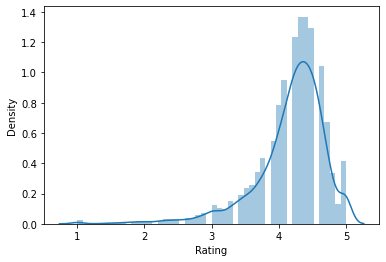

In [52]:
sns.distplot(df1['Rating'])

<AxesSubplot:xlabel='Rating', ylabel='Density'>

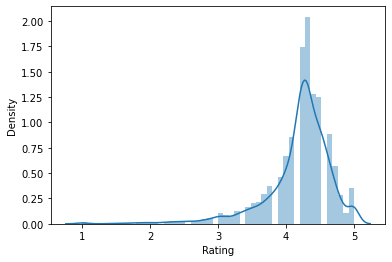

In [53]:
sns.distplot(a['Rating'])

In [54]:
df1['Rating']=a['Rating']

In [90]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [80]:
b=df1.groupby('Category')

In [81]:
x=b['Installs'].mean()

In [70]:
y=b['Price'].sum()

In [71]:
z=b['Reviews'].mean()

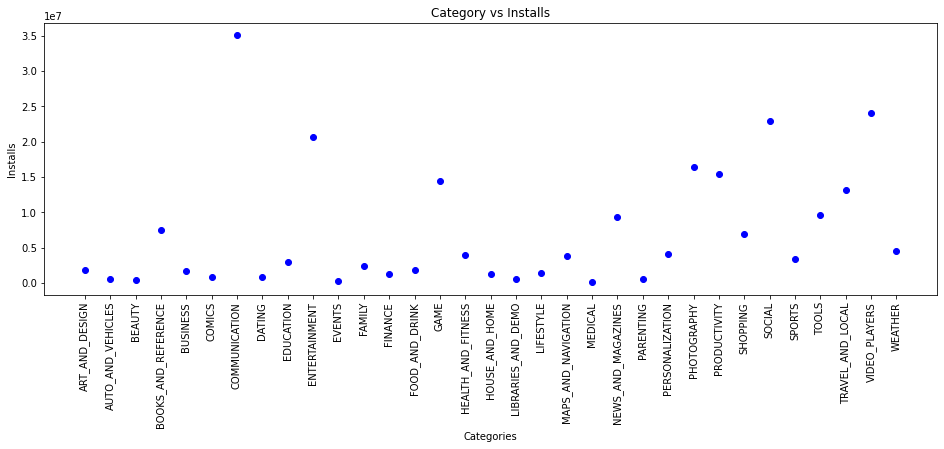

In [84]:
plt.figure(figsize=(16,5))
plt.plot(x,'ro',color='b')
plt.xticks(rotation=90)
plt.title('Category vs Installs')
plt.xlabel("Categories")
plt.ylabel("Installs")
plt.show()

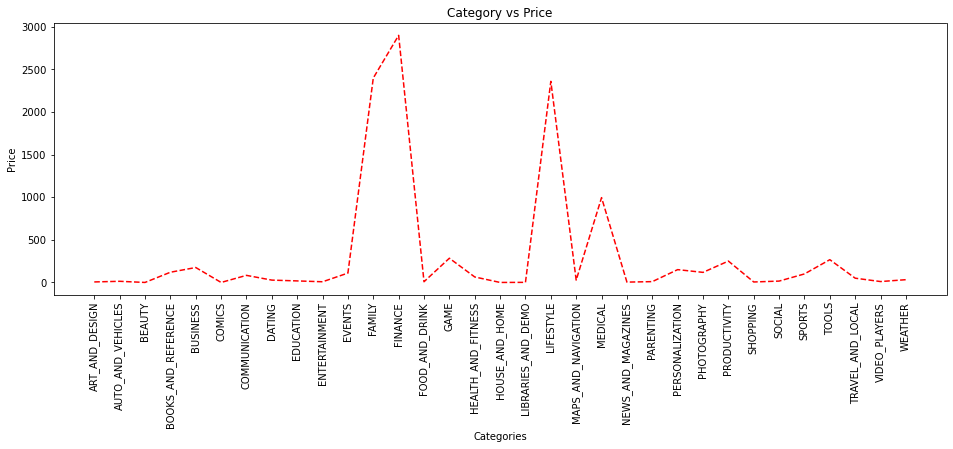

In [85]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--',color='r')
plt.xticks(rotation=90)
plt.title('Category vs Price')
plt.xlabel("Categories")
plt.ylabel("Price")
plt.show()

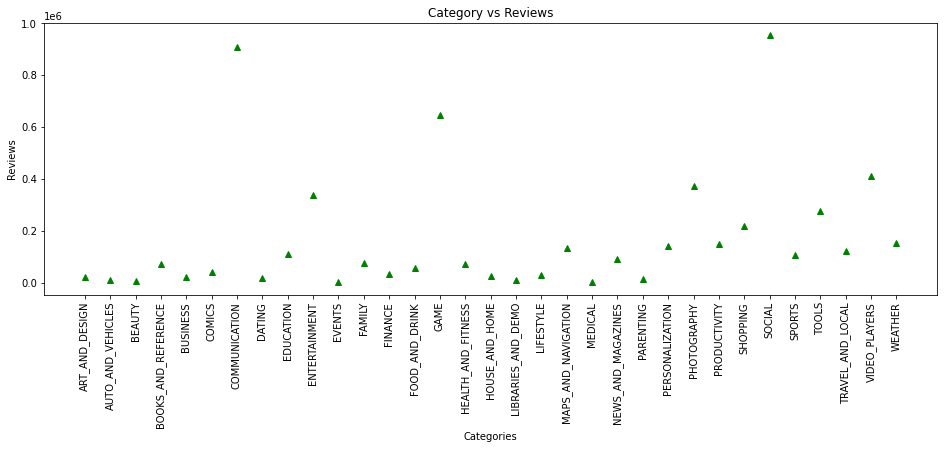

In [88]:
plt.figure(figsize=(16,5))
plt.plot(z,'^',color='g')
plt.xticks(rotation=90)
plt.title('Category vs Reviews')
plt.xlabel("Categories")
plt.ylabel("Reviews")
plt.show()